In [14]:
import numpy as np
import torch
from torchvision.io import read_image
import clip

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [6]:
model, preprocessng = clip.load('RN50')

In [9]:
from torchvision.ops import RoIAlign

In [145]:
preprocessng

Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=warn)
    CenterCrop(size=(224, 224))
    <function _convert_image_to_rgb at 0x7fd6cc5335e0>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

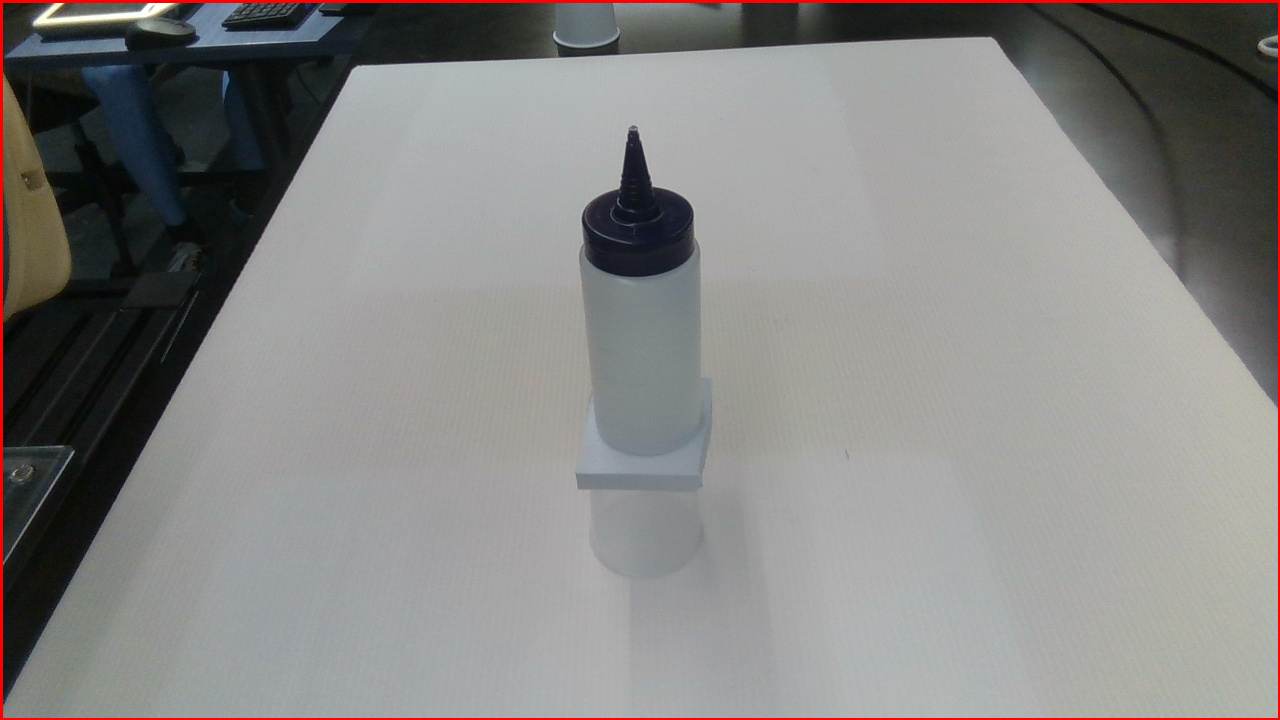

In [137]:
image = Image.open('/root/krishneel/Downloads/2023-06-13-16-09-53/image/000000.jpg')

# bbox = [550, 100, 720, 500]
bbox = [0, 0, 1280, 720]

im = image.copy()
draw = ImageDraw.Draw(im)
draw.rectangle([tuple(bbox[:2]), tuple(bbox[2:])], outline='red', width=3)

im

2023-06-19 18:59:35,528 [image.py:720] WARNING: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


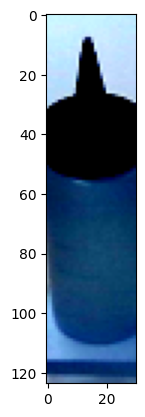

In [109]:
x = img.permute((1, 2, 0)).numpy()
x1, y1, x2, y2 = bb[0].cpu().int().numpy()

x = x[y1: y2, x1: x2]
plt.imshow(x)

In [141]:
bb = torch.Tensor([bbox]).to(torch.float32).cuda()

from torchvision.transforms.v2 import functional as F

# bb = F.resize_bounding_box(bb, image.size[::-1], [224, 224])
# bb = bb[0]

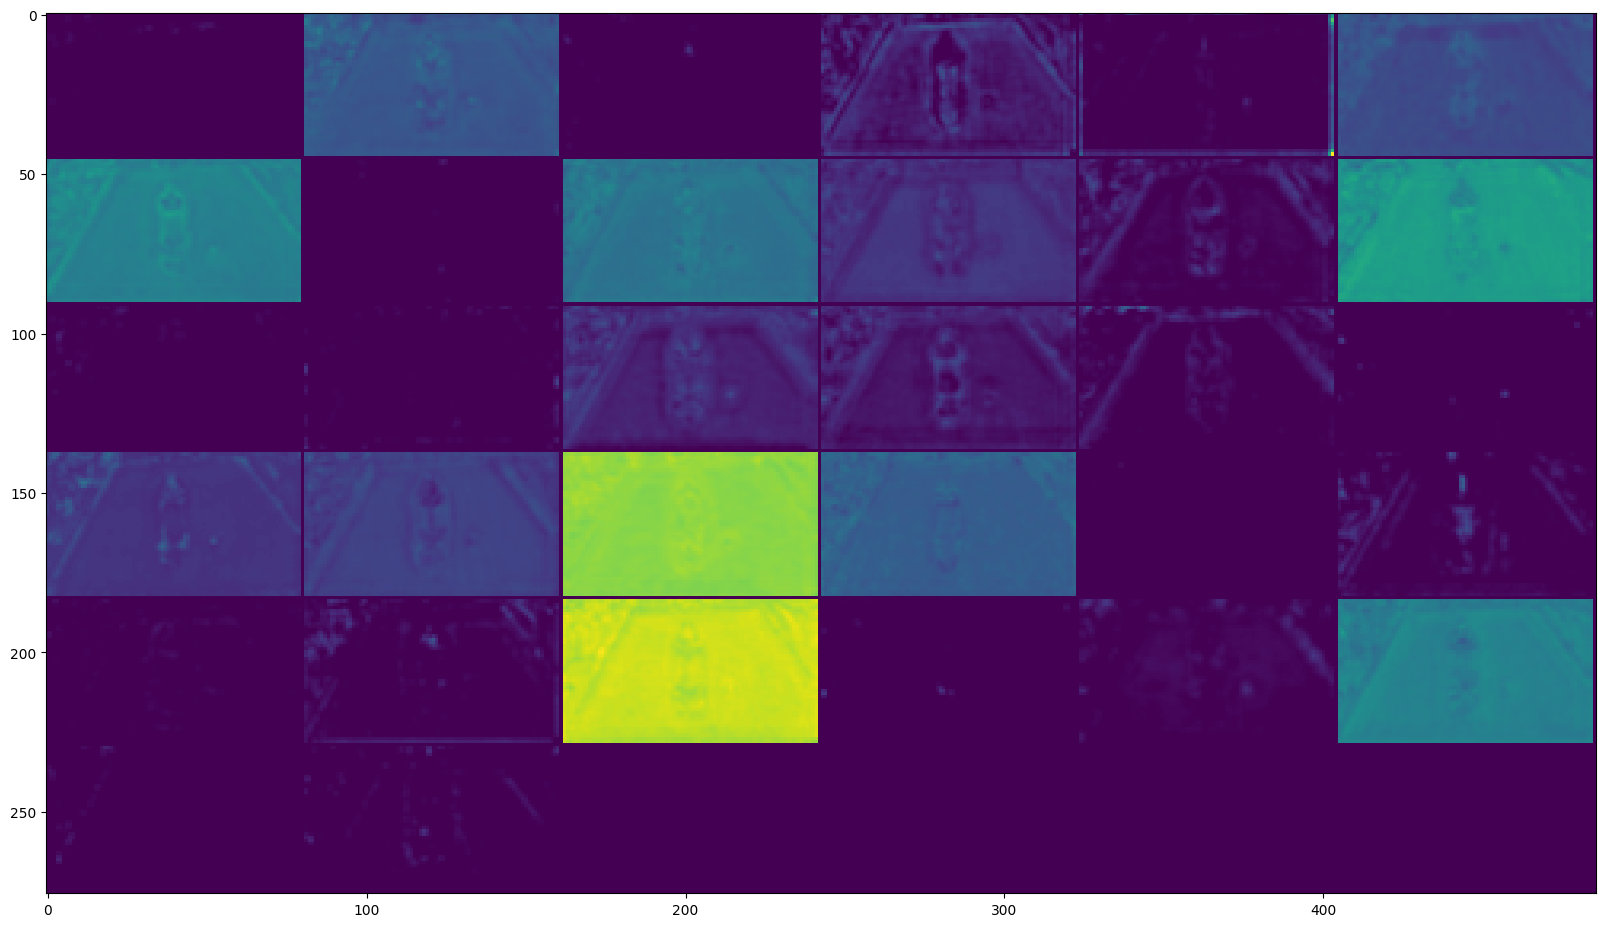

In [144]:
roi = RoIAlign([45, 80], 1/16.0, 0)
t = roi(features.float(), [bb])[0].cpu().numpy()

t = make_square_grid(t[:32])
plt.imshow(t)

In [138]:
features = []
def hook(n, i, o):
    global features
    features = o
    
hid = model.visual.layer3.register_forward_hook(hook)

In [139]:
# img = preprocessng(image)
img = torch.from_numpy(np.asarray(image)).permute(2, 0, 1).float() / 255.0

with torch.no_grad():
    y = model.visual(img.cuda()[None, :])
    
hid.remove()

RuntimeError: The size of tensor a (881) must match the size of tensor b (50) at non-singleton dimension 0

(1024, 45, 80)


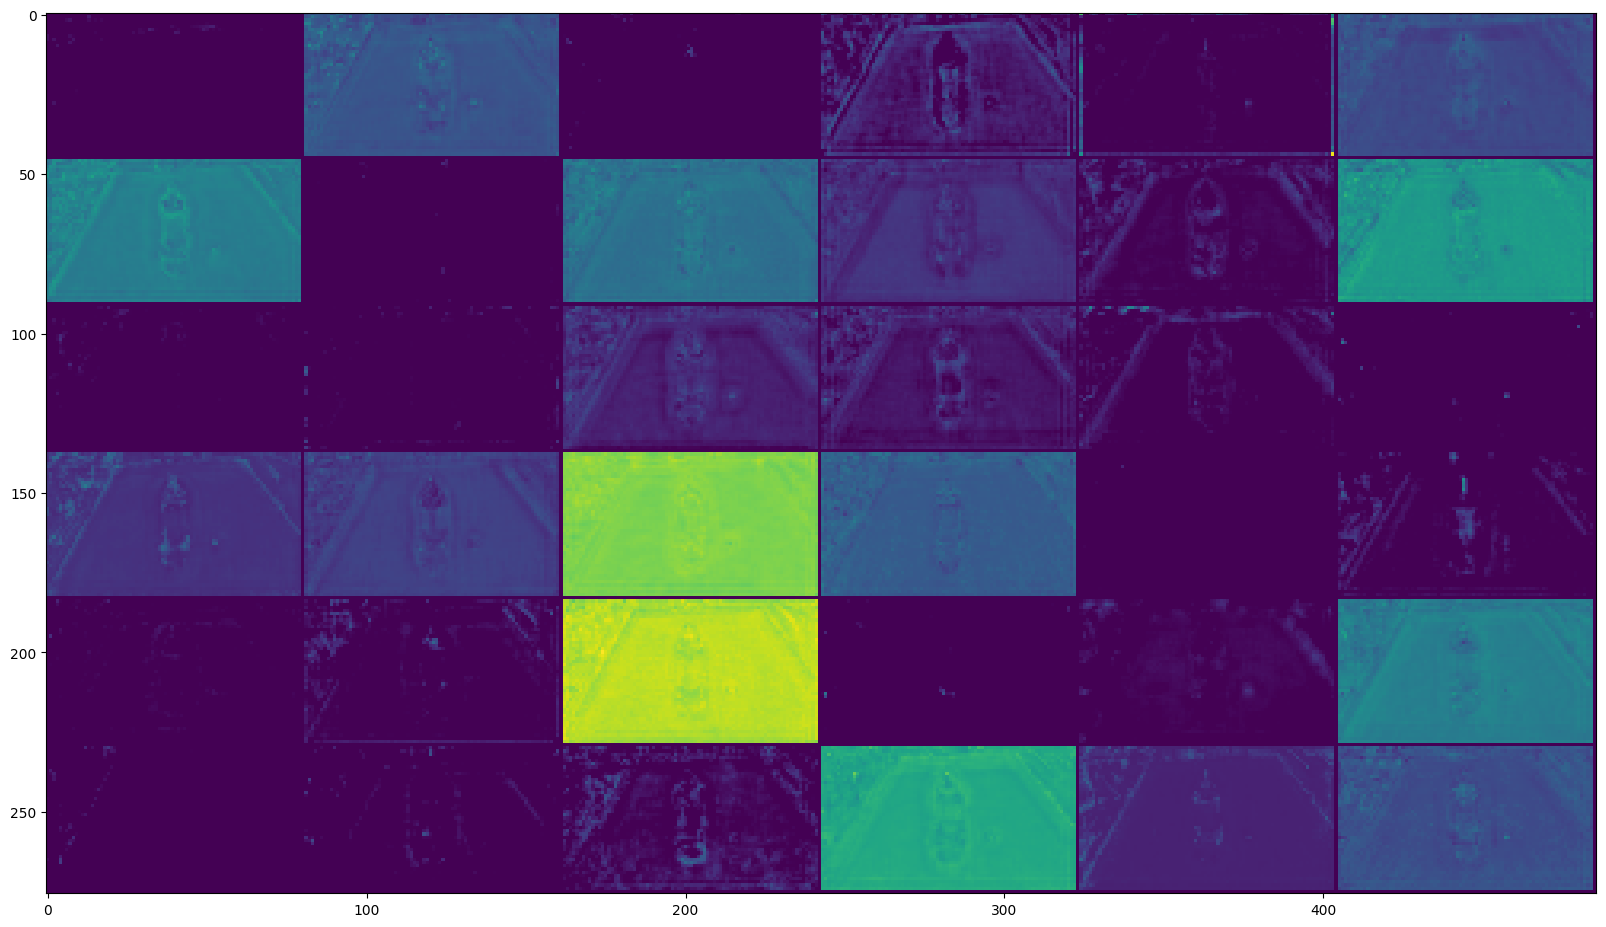

In [140]:
x = features[0].float().cpu().numpy()
print(x.shape)

from igniter.visualizer import make_square_grid

z = make_square_grid(x[:36])

plt.rcParams['figure.figsize'] = [20, 16]
plt.imshow(z)